# Pivot points - Analytics

### Import Library

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120

### Load Price Data

In [2]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [3]:
data_tmp = dataset.copy()

In [4]:
def prepareData(htd):
    _1_d_df = htd.copy()
    _1_d_df = _1_d_df.resample("D").agg({
        'Open': 'first',
        'Close': 'last',
        'High': 'max',
        'Low': 'min'
    })
    _1_d_df.dropna(inplace=True)
    _1_d_df = cal_pivots(_1_d_df)
    _1_d_df = _1_d_df[['P', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Close']].rename(columns={'Close': 'Day_Close'})
    _1_d_df.dropna(inplace=True)

    _1_d_df['prev_day_Close'] = _1_d_df['Day_Close'].shift(1)
    htd = htd.assign(time_d=pd.PeriodIndex(htd.index, freq='1D').to_timestamp())
    htd = pd.merge(htd, _1_d_df, left_on="time_d", right_index=True, how="left")
    htd.dropna(inplace=True)
    return htd


def cal_first_close(tick):
    tick = tick[100 * tick.index.hour + tick.index.minute == 900]
    return tick


def cal_pivot(row):
    pivot = (row['High_s'] + row['Low_s'] + row['Close_s']) / 3
    return pivot


def cal_r1(row):
    result = 2 * row['P'] - row['Low_s']
    return result


def cal_r2(row):
    result = row['P'] + row['High_s'] - row['Low_s']
    return result


def cal_r3(row):
    # result = row['P'] + 2 * (row['High_s'] - row['Low_s'])    # Classic
    result = row['P'] * 2 + row['High_s'] - 2 * row['Low_s']
    return result


def cal_r4(row):
    # result = row['P'] + 3 * (row['High_s'] - row['Low_s'])    # Classic
    result = row['P'] * 3 + row['High_s'] - 3 * row['Low_s']
    return result


def cal_r5(row):
    # result = row['P'] + 4 * (row['High_s'] - row['Low_s'])      # Classic
    result = row['P'] * 4 + row['High_s'] - 4 * row['Low_s']
    return result


def cal_r6(row):
    # result = row['P'] + 5 * (row['High_s'] - row['Low_s'])      # Classic
    result = row['P'] * 5 + row['High_s'] - 5 * row['Low_s']
    return result


def cal_s1(row):
    result = 2 * row['P'] - row['High_s']
    return result


def cal_s2(row):
    result = row['P'] - (row['High_s'] - row['Low_s'])
    return result


def cal_s3(row):
    # result = row['P'] - 2 * (row['High_s'] - row['Low_s'])  # Classic
    result = row['P'] * 2 - (2 * row['High_s'] - row['Low_s'])
    return result


def cal_s4(row):
    # result = row['P'] - 3 * (row['High_s'] - row['Low_s'])  # Classic
    result = row['P'] * 3 - (3 * row['High_s'] - row['Low_s'])
    return result


def cal_s5(row):
    # result = row['P'] - 4 * (row['High_s'] - row['Low_s'])  # Classic
    result = row['P'] * 4 - (4 * row['High_s'] - row['Low_s'])
    return result


def cal_s6(row):
    # result = row['P'] - 5 * (row['High_s'] - row['Low_s'])  # Classic
    result = row['P'] * 5 - (5 * row['High_s'] - row['Low_s'])
    return result


def cal_pivots(_1_d_df):
    _1_d_df['High_s'] = _1_d_df['High'].shift(1)
    _1_d_df['Low_s'] = _1_d_df['Low'].shift(1)
    _1_d_df['Close_s'] = _1_d_df['Close'].shift(1)
    _1_d_df['P'] = _1_d_df.apply(
        lambda row: cal_pivot(row), axis=1)
    _1_d_df['R1'] = _1_d_df.apply(
        lambda row: cal_r1(row), axis=1)
    _1_d_df['R2'] = _1_d_df.apply(
        lambda row: cal_r2(row), axis=1)
    _1_d_df['R3'] = _1_d_df.apply(
        lambda row: cal_r3(row), axis=1)
    _1_d_df['R4'] = _1_d_df.apply(
        lambda row: cal_r4(row), axis=1)
    _1_d_df['R5'] = _1_d_df.apply(
        lambda row: cal_r5(row), axis=1)
    _1_d_df['R6'] = _1_d_df.apply(
        lambda row: cal_r6(row), axis=1)
    _1_d_df['S1'] = _1_d_df.apply(
        lambda row: cal_s1(row), axis=1)
    _1_d_df['S2'] = _1_d_df.apply(
        lambda row: cal_s2(row), axis=1)
    _1_d_df['S3'] = _1_d_df.apply(
        lambda row: cal_s3(row), axis=1)
    _1_d_df['S4'] = _1_d_df.apply(
        lambda row: cal_s4(row), axis=1)
    _1_d_df['S5'] = _1_d_df.apply(
        lambda row: cal_s5(row), axis=1)
    _1_d_df['S6'] = _1_d_df.apply(
        lambda row: cal_s6(row), axis=1)
    return _1_d_df

In [5]:
data = prepareData(data_tmp)
data

,Open,High,Low,Close,Volume,time_d,P,R1,R2,R3,...,R5,R6,S1,S2,S3,S4,S5,S6,Day_Close,prev_day_Close
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-15 09:00:00,958.0,958.8,958.0,958.7,1028,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,984.333333,989.966667,953.666667,948.033333,943.966667,939.9,935.833333,931.766667,946.6,959.3
2018-08-15 09:05:00,958.6,959.4,958.6,959.3,656,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,984.333333,989.966667,953.666667,948.033333,943.966667,939.9,935.833333,931.766667,946.6,959.3
2018-08-15 09:10:00,959.3,960.5,959.3,960.4,927,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,984.333333,989.966667,953.666667,948.033333,943.966667,939.9,935.833333,931.766667,946.6,959.3
2018-08-15 09:15:00,960.3,961.1,960.3,960.7,1413,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,984.333333,989.966667,953.666667,948.033333,943.966667,939.9,935.833333,931.766667,946.6,959.3
2018-08-15 09:20:00,960.8,960.8,960.1,960.3,1172,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,984.333333,989.966667,953.666667,948.033333,943.966667,939.9,935.833333,931.766667,946.6,959.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-19 14:15:00,1301.2,1301.6,1298.3,1299.5,9058,2024-07-19,1296.800000,1305.700000,1313.900000,1322.800000,...,1340.600000,1349.500000,1288.600000,1279.700000,1271.500000,1263.3,1255.100000,1246.900000,1297.1,1297.5
2024-07-19 14:20:00,1299.1,1301.8,1295.3,1301.6,12762,2024-07-19,1296.800000,1305.700000,1313.900000,1322.800000,...,1340.600000,1349.500000,1288.600000,1279.700000,1271.500000,1263.3,1255.100000,1246.900000,1297.1,1297.5
2024-07-19 14:25:00,1302.4,1302.6,1300.1,1302.2,8096,2024-07-19,1296.800000,1305.700000,1313.900000,1322.800000,...,1340.600000,1349.500000,1288.600000,1279.700000,1271.500000,1263.3,1255.100000,1246.900000,1297.1,1297.5


In [6]:
data['prev_Close'] = data['Close'].shift(1)
data = data[data.High != data.Low]
data['rate_x'] = data.apply(lambda r: 100 * (r['Close'] - r['prev_day_Close']) / r['prev_day_Close'], axis=1)
data['rate_y'] = data.apply(lambda r: 100 * (r['Close'] - r['P']) / r['P'], axis=1)

In [7]:
data.dropna(inplace=True)
data

,Open,High,Low,Close,Volume,time_d,P,R1,R2,R3,...,S2,S3,S4,S5,S6,Day_Close,prev_day_Close,prev_Close,rate_x,rate_y
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-15 09:05:00,958.6,959.4,958.6,959.3,656,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,948.033333,943.966667,939.9,935.833333,931.766667,946.6,959.3,958.7,0.000000,0.163581
2018-08-15 09:10:00,959.3,960.5,959.3,960.4,927,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,948.033333,943.966667,939.9,935.833333,931.766667,946.6,959.3,959.3,0.114667,0.278435
2018-08-15 09:15:00,960.3,961.1,960.3,960.7,1413,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,948.033333,943.966667,939.9,935.833333,931.766667,946.6,959.3,960.4,0.145940,0.309759
2018-08-15 09:20:00,960.8,960.8,960.1,960.3,1172,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,948.033333,943.966667,939.9,935.833333,931.766667,946.6,959.3,960.7,0.104243,0.267994
2018-08-15 09:25:00,960.3,960.3,959.0,959.0,1735,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,948.033333,943.966667,939.9,935.833333,931.766667,946.6,959.3,960.3,-0.031273,0.132257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-19 14:05:00,1301.9,1301.9,1297.9,1298.0,10112,2024-07-19,1296.800000,1305.700000,1313.900000,1322.800000,...,1279.700000,1271.500000,1263.3,1255.100000,1246.900000,1297.1,1297.5,1301.9,0.038536,0.092535
2024-07-19 14:10:00,1297.9,1302.5,1297.6,1301.4,11679,2024-07-19,1296.800000,1305.700000,1313.900000,1322.800000,...,1279.700000,1271.500000,1263.3,1255.100000,1246.900000,1297.1,1297.5,1298.0,0.300578,0.354719
2024-07-19 14:15:00,1301.2,1301.6,1298.3,1299.5,9058,2024-07-19,1296.800000,1305.700000,1313.900000,1322.800000,...,1279.700000,1271.500000,1263.3,1255.100000,1246.900000,1297.1,1297.5,1301.4,0.154143,0.208205


### Calcualting return

In [8]:
def cal_cross(row):
    cross = ''
    if row['Low'] < row['S4'] < row['High'] or row['Low'] < row['S3'] < row['High'] or \
                row['Low'] < row['S2'] < row['High'] or row['Low'] < row['S1'] < row['High']:
        cross = 'cross_s'
    elif row['Low'] < row['R1'] < row['High']\
                or row['Low'] < row['R2'] < row['High'] or row['Low'] < row['R3'] < row['High']\
                or row['Low'] < row['R4'] < row['High']:
        cross = 'cross_r'
    elif row['Low'] < row['P'] < row['High']:
        cross = 'cross_p'
    return cross
data['cross'] = data.apply(lambda r: cal_cross(r), axis=1)

In [9]:
from cal_return_pivots import cal_return
data = cal_return(data)

In [10]:
working_data = data[data['cross'] != '']

In [11]:
working_data = working_data[100*working_data.index.hour + working_data.index.minute < 1420]

In [12]:
data_test = working_data.copy()
data_test = data_test[data_test.index > '2024-01-01 00:00:00']
### Ignore this year data => tranh over fitting
working_data = working_data[working_data.index < '2024-01-01 00:00:00']

In [13]:
working_data

,Open,High,Low,Close,Volume,time_d,P,R1,R2,R3,...,prev_Close,rate_x,rate_y,cross,min_price,max_price,return,exit_time,entry_price,exit_price
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-15 10:50:00,959.6,959.6,957.5,958.0,3980,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,959.7,-0.135515,0.027844,cross_p,955.2,959.4,-2.8,2018-08-15 13:05:00,958.0,955.2
2018-08-15 10:55:00,958.0,958.7,957.6,958.1,2078,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,958.0,-0.125091,0.038285,cross_p,955.2,959.4,-2.9,2018-08-15 13:05:00,958.1,955.2
2018-08-15 11:10:00,957.6,958.3,957.5,957.7,1515,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,958.0,-0.166788,-0.003480,cross_p,954.7,959.4,1.7,2018-08-15 13:50:00,957.7,959.4
2018-08-15 11:15:00,957.6,958.2,957.5,957.8,1161,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,957.7,-0.156364,0.006961,cross_p,954.7,959.4,1.6,2018-08-15 13:50:00,957.8,959.4
2018-08-15 11:25:00,956.5,958.2,956.5,958.2,1603,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,956.5,-0.114667,0.048726,cross_p,954.7,959.4,1.2,2018-08-15 13:50:00,958.2,959.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28 11:25:00,1120.6,1125.2,1120.5,1125.2,10330,2023-12-28,1120.000000,1123.100000,1129.300000,1132.400000,...,1120.7,0.743128,0.464286,cross_r,1125.2,1135.2,4.7,2023-12-28 14:25:00,1125.2,1129.9
2023-12-28 13:30:00,1128.9,1129.6,1128.0,1128.5,3759,2023-12-28,1120.000000,1123.100000,1129.300000,1132.400000,...,1128.7,1.038589,0.758929,cross_r,1127.8,1134.7,5.4,2023-12-28 14:05:00,1128.5,1133.9
2023-12-28 13:40:00,1128.2,1131.8,1128.2,1131.0,7001,2023-12-28,1120.000000,1123.100000,1129.300000,1132.400000,...,1128.2,1.262423,0.982143,cross_r,1129.8,1134.7,2.9,2023-12-28 14:05:00,1131.0,1133.9


## Full all crosses

In [14]:
working_data['rate_x'].describe()

count    13297.000000
mean         0.015919
std          1.025496
min         -9.236111
25%         -0.442311
50%          0.056395
75%          0.537884
max          6.359223
Name: rate_x, dtype: float64

In [15]:
working_data['rate_y'].describe()

count    13297.000000
mean         0.000130
std          1.068789
min         -7.125656
25%         -0.403200
50%          0.008799
75%          0.497744
max          6.831988
Name: rate_y, dtype: float64

In [16]:
working_data['rate_x_group'] = pd.qcut(working_data.rate_x, 15)
working_data['rate_y_group'] = pd.qcut(working_data.rate_y, 15)

In [17]:
lsg = working_data.groupby(['rate_x_group', 'rate_y_group'])[['return']].mean()
lsg = lsg.reset_index()
lsg_pivot = lsg.pivot(index="rate_x_group", columns="rate_y_group", values="return").sort_index(ascending=False)
lsg_pivot = lsg_pivot[lsg_pivot.columns].astype(float)

In [18]:
lsg_pivot

rate_y_group,"(-7.127000000000001, -1.488]","(-1.488, -0.922]","(-0.922, -0.592]","(-0.592, -0.35]","(-0.35, -0.129]","(-0.129, -0.0374]","(-0.0374, -0.0036]","(-0.0036, 0.024]","(0.024, 0.076]","(0.076, 0.257]","(0.257, 0.443]","(0.443, 0.675]","(0.675, 0.928]","(0.928, 1.339]","(1.339, 6.832]"
rate_x_group,,,,,,,,,,,,,,,
"(1.262, 6.359]",NaN,NaN,NaN,5.100000,2.357143,0.040000,3.266667,-1.520000,-0.850000,1.163636,0.529412,0.126667,0.348837,-0.039865,0.587458
"(0.885, 1.262]",NaN,2.100000,NaN,12.400000,-0.336000,0.157692,-0.628571,-0.356000,-0.379167,-0.325000,-1.050000,0.380000,0.436486,0.894637,0.237900
"(0.662, 0.885]",NaN,NaN,3.625000,0.240000,0.144444,-0.295238,0.082353,-1.817647,-0.420833,0.603333,-0.117391,0.736441,0.487023,0.078000,0.565333
"(0.507, 0.662]",NaN,NaN,NaN,0.575000,-0.066667,1.400000,-0.984615,1.650000,-0.773333,-0.676596,0.161194,0.258898,-0.105628,-0.212319,1.400000
"(0.369, 0.507]",NaN,NaN,1.200000,-5.900000,0.130769,-0.128889,-0.885714,-0.590244,-1.026667,0.720909,0.678804,-0.260731,0.000602,0.565625,NaN
"(0.253, 0.369]",NaN,2.700000,2.300000,5.700000,0.428571,-0.304444,0.353125,-0.132787,0.182353,0.855085,-0.162791,-0.151485,0.957143,NaN,NaN
"(0.121, 0.253]",NaN,NaN,NaN,-10.000000,-0.508696,-0.143023,0.042453,0.467227,0.137190,-0.482383,-0.197927,-0.106977,3.700000,-5.400000,NaN
"(0.0, 0.121]",NaN,NaN,NaN,4.250000,0.759375,0.017273,-0.056021,-0.029016,0.219663,0.319588,-1.705000,-6.000000,-9.300000,NaN,NaN
"(-0.136, 0.0]",NaN,NaN,NaN,-3.075000,0.606579,0.499468,0.141475,-0.261033,0.140411,-0.668817,-2.266667,-4.850000,NaN,NaN,NaN


<Axes: xlabel='rate_y_group', ylabel='rate_x_group'>

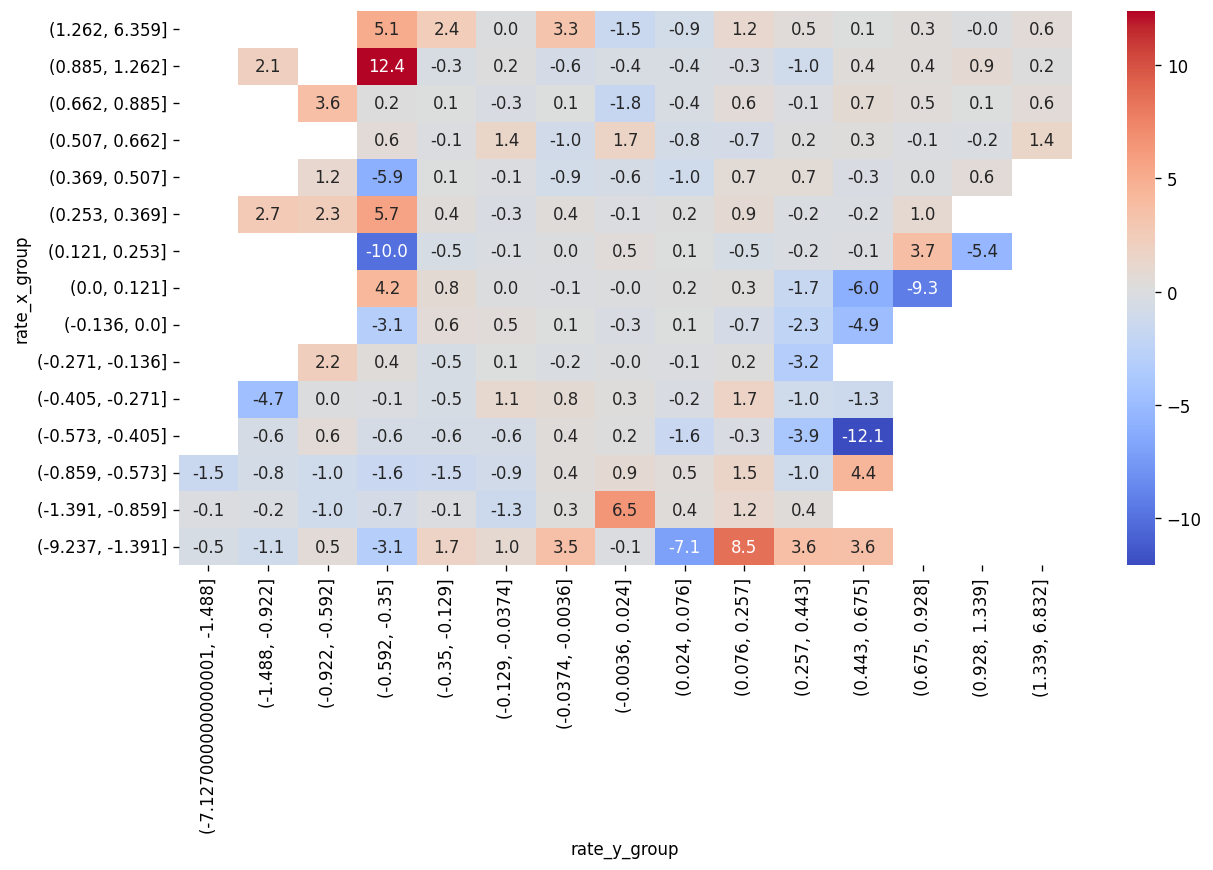

In [19]:
sns.heatmap(lsg_pivot, cmap = 'coolwarm', annot=True, fmt=".1f")

## Cross P

In [20]:
cross_p = working_data[working_data.cross == 'cross_p']
cross_p['rate_y'].describe()

count    4.659000e+03
mean    -2.065596e-03
std      1.292345e-01
min     -1.023745e+00
25%     -4.397186e-02
50%      1.296611e-14
75%      4.482295e-02
max      1.545089e+00
Name: rate_y, dtype: float64

In [21]:
cross_p['rate_x'].describe()

count    4659.000000
mean        0.058828
std         0.466690
min        -4.085802
25%        -0.175329
50%         0.017215
75%         0.239634
max         2.431454
Name: rate_x, dtype: float64

In [22]:
cross_p['rate_x_group'] = pd.qcut(cross_p.rate_x, 10)
cross_p['rate_y_group'] = pd.qcut(cross_p.rate_y, 15)

<Axes: xlabel='rate_y_group', ylabel='rate_x_group'>

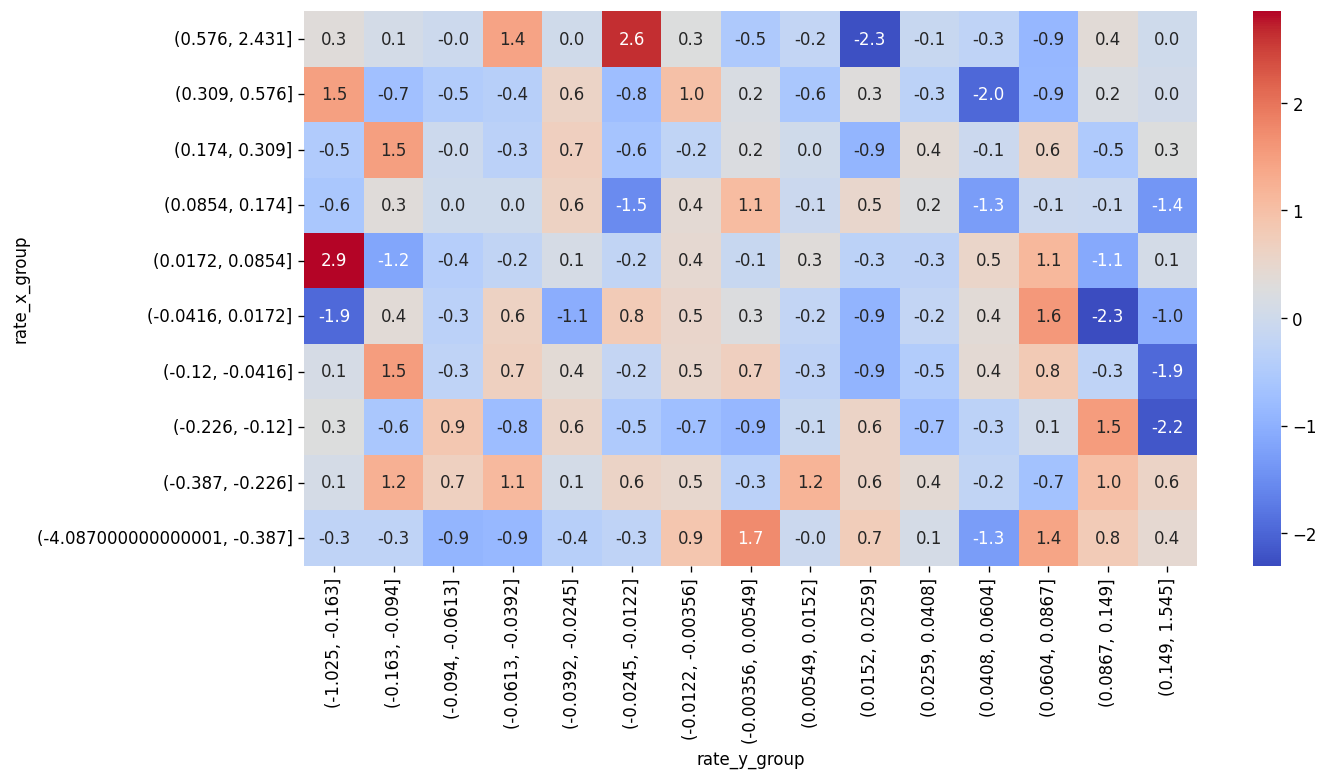

In [23]:
lsg = cross_p.groupby(['rate_x_group', 'rate_y_group'])[['return']].mean()
lsg = lsg.reset_index()
lsg_pivot = lsg.pivot(index="rate_x_group", columns="rate_y_group", values="return").sort_index(ascending=False)
lsg_pivot = lsg_pivot[lsg_pivot.columns].astype(float)
sns.heatmap(lsg_pivot, cmap = 'coolwarm', annot=True, fmt=".1f")

In [24]:
cross_r = working_data[working_data.cross == 'cross_r']
cross_r['rate_y'].describe()

count    4600.000000
mean        0.959968
std         0.752560
min        -0.122939
25%         0.458292
50%         0.760916
75%         1.163321
max         6.831988
Name: rate_y, dtype: float64

In [25]:
cross_r['rate_x'].describe()

count    4600.000000
mean        0.857041
std         0.740302
min        -0.032219
25%         0.407422
50%         0.650221
75%         1.033088
max         6.359223
Name: rate_x, dtype: float64

In [26]:
cross_r['rate_x_group'] = pd.qcut(cross_r.rate_x, 10)
cross_r['rate_y_group'] = pd.qcut(cross_r.rate_y, 15)

<Axes: xlabel='rate_y_group', ylabel='rate_x_group'>

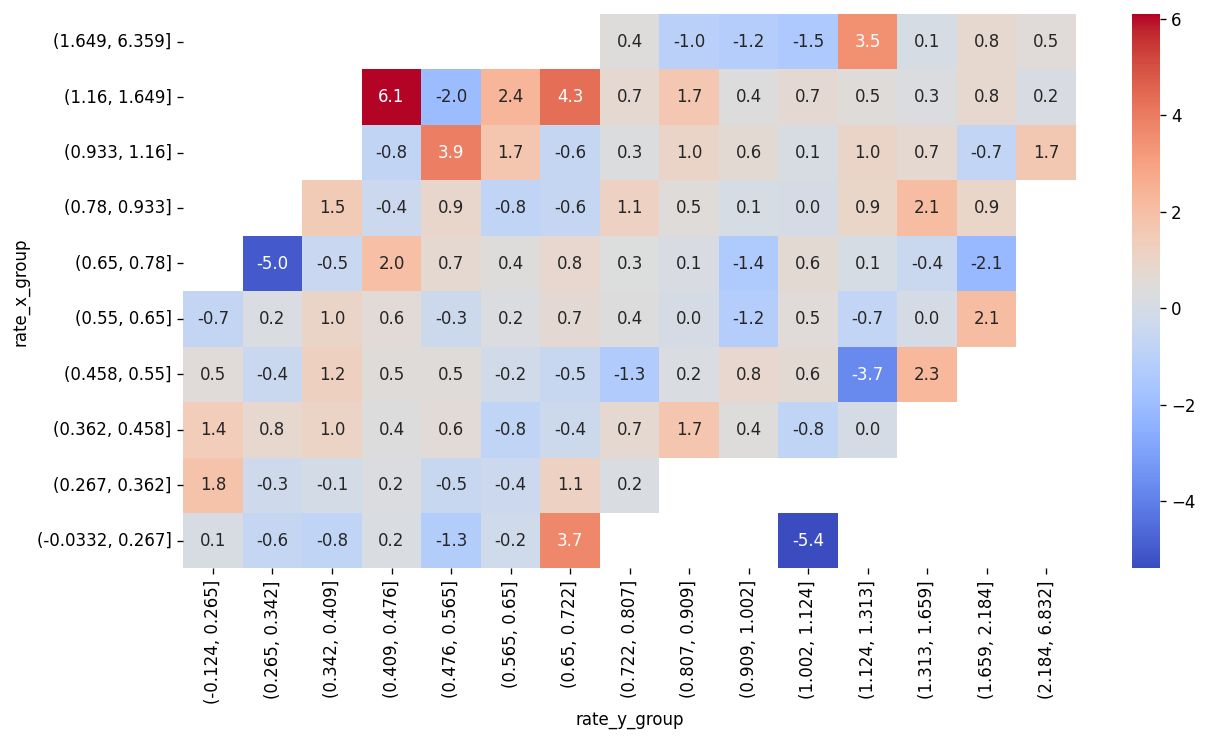

In [27]:
lsg = cross_r.groupby(['rate_x_group', 'rate_y_group'])[['return']].mean()
lsg = lsg.reset_index()
lsg_pivot = lsg.pivot(index="rate_x_group", columns="rate_y_group", values="return").sort_index(ascending=False)
lsg_pivot = lsg_pivot[lsg_pivot.columns].astype(float)
sns.heatmap(lsg_pivot, cmap = 'coolwarm', annot=True, fmt=".1f")

In [28]:
data_test[data_test.index == '2024-06-27 09:00:00'][['Open', 'High', 'Low', 'Close', 'rate_x', 'rate_y', 'cross', 'entry_price', 'exit_price', 'exit_time', 'return', 'min_price', 'max_price']]

,Open,High,Low,Close,rate_x,rate_y,cross,entry_price,exit_price,exit_time,return,min_price,max_price
Date,,,,,,,,,,,,,
2024-06-27 09:00:00,1285.0,1286.9,1284.5,1285.0,-0.387597,-0.046671,cross_p,1285.0,1281.9,2024-06-27 10:40:00,-3.1,1281.7,1286.4


In [29]:
data_test[(data_test.index > '2024-06-27 08:00:00') & (data_test.index < '2024-06-27 15:00:00')][['Open', 'High', 'Low', 'Close', 'rate_x', 'rate_y', 'cross', 'entry_price', 'exit_price', 'exit_time', 'return', 'min_price', 'max_price']]

,Open,High,Low,Close,rate_x,rate_y,cross,entry_price,exit_price,exit_time,return,min_price,max_price
Date,,,,,,,,,,,,,
2024-06-27 09:00:00,1285.0,1286.9,1284.5,1285.0,-0.387597,-4.667082e-02,cross_p,1285.0,1281.9,2024-06-27 10:40:00,-3.1,1281.7,1286.4
2024-06-27 09:15:00,1284.1,1285.9,1284.1,1285.7,-0.333333,7.778469e-03,cross_p,1285.7,1281.9,2024-06-27 10:40:00,-3.8,1281.7,1286.4
2024-06-27 09:20:00,1285.7,1286.4,1285.1,1285.7,-0.333333,7.778469e-03,cross_p,1285.7,1281.9,2024-06-27 10:40:00,-3.8,1281.7,1286.2
2024-06-27 09:25:00,1285.7,1286.0,1284.3,1284.4,-0.434109,-9.334163e-02,cross_p,1284.4,1281.9,2024-06-27 10:40:00,-2.5,1281.7,1286.2
2024-06-27 10:10:00,1284.7,1286.2,1284.6,1285.8,-0.325581,1.555694e-02,cross_p,1285.8,1281.4,2024-06-27 10:55:00,-4.4,1280.9,1285.9
2024-06-27 10:15:00,1285.8,1285.9,1284.8,1285.6,-0.341085,-1.768619e-14,cross_p,1285.6,1281.4,2024-06-27 10:55:00,-4.2,1280.9,1285.9
2024-06-27 10:20:00,1285.6,1285.9,1284.7,1284.7,-0.410853,-7.000622e-02,cross_p,1284.7,1285.2,2024-06-27 13:15:00,0.5,1280.8,1285.6
2024-06-27 13:25:00,1285.1,1286.3,1284.7,1286.1,-0.302326,3.889235e-02,cross_p,1286.1,1290.0,2024-06-27 14:00:00,3.9,1283.8,1290.3
2024-06-27 13:35:00,1286.7,1287.5,1285.3,1286.0,-0.310078,3.111388e-02,cross_p,1286.0,1290.0,2024-06-27 14:00:00,4.0,1283.8,1290.3


In [30]:
data_test[data_test['return'] == 0]

,Open,High,Low,Close,Volume,time_d,P,R1,R2,R3,...,prev_Close,rate_x,rate_y,cross,min_price,max_price,return,exit_time,entry_price,exit_price
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02 10:55:00,1135.5,1135.5,1134.2,1134.7,6783,2024-01-02,1135.000000,1139.100000,1143.600000,1147.700000,...,1135.5,0.008814,-0.026432,cross_p,1131.0,1135.8,0,,1134.7,0
2024-01-02 13:50:00,1134.0,1135.7,1133.8,1134.1,5565,2024-01-02,1135.000000,1139.100000,1143.600000,1147.700000,...,1133.6,-0.044068,-0.079295,cross_p,1131.3,1135.8,0,,1134.1,0
2024-01-02 14:00:00,1135.2,1135.3,1133.2,1133.7,5157,2024-01-02,1135.000000,1139.100000,1143.600000,1147.700000,...,1135.0,-0.079323,-0.114537,cross_p,1131.3,1135.8,0,,1133.7,0
2024-01-02 14:05:00,1133.6,1135.8,1133.5,1134.7,4353,2024-01-02,1135.000000,1139.100000,1143.600000,1147.700000,...,1133.7,0.008814,-0.026432,cross_p,1131.3,1135.6,0,,1134.7,0
2024-01-02 14:10:00,1134.9,1135.5,1133.6,1134.4,3081,2024-01-02,1135.000000,1139.100000,1143.600000,1147.700000,...,1134.7,-0.017627,-0.052863,cross_p,1131.3,1135.6,0,,1134.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-03 14:05:00,1308.5,1308.6,1305.7,1306.6,6610,2024-07-03,1292.566667,1301.633333,1308.066667,1317.133333,...,1308.4,0.880173,1.085695,cross_r,1305.1,1308.0,0,,1306.6,0
2024-07-09 14:15:00,1321.3,1321.9,1318.4,1319.1,11670,2024-07-09,1312.500000,1319.400000,1324.800000,1331.700000,...,1320.8,0.388128,0.502857,cross_r,1317.3,1319.9,0,,1319.1,0
2024-07-11 10:55:00,1314.8,1314.8,1313.7,1314.4,4411,2024-07-11,1313.866667,1318.033333,1326.066667,1330.233333,...,1315.0,0.335878,0.040593,cross_p,1306.0,1314.4,0,,1314.4,0
